## Ejercicio Introducción a Series de Tiempo

#### I took the datasets from yahoo finance:

- https://finance.yahoo.com/quote/ECOPETROL.CL/history?period1=1523145600&period2=1680912000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

- https://finance.yahoo.com/quote/TERPEL.CL/history?period1=1523145600&period2=1680912000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

- Ecopetrol y Terpel son las más grandes empresas Colombianas 

In [2]:
# Librerias de Base
import warnings
warnings.filterwarnings('ignore')

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

#### Importación de datos ()

In [151]:
os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 30')

# Uso de la funcion read_csv
df_ecopetrolcl = pd.read_csv('ECOPETROL.CL.csv')

#### Ejercicios de limpieza de datos y visualización básica, inclusión de timestamps

In [152]:
df_ecopetrolcl.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1025,2022-03-14,3207.00,3370.00,3185.00,3207.00,2944.12,19354640.00
633,2020-09-10,2015.00,2075.00,2015.00,2015.00,1836.27,12231527.00
99,2018-08-24,3240.00,3240.00,3190.00,3240.00,2477.56,7774766.00
170,2018-12-03,3290.00,3300.00,3160.00,3290.00,2549.06,10101567.00
700,2020-12-14,2287.00,2335.00,2264.00,2287.00,2084.14,12270306.00
737,2021-02-03,2090.00,2150.00,2090.00,2090.00,1904.62,11235339.00
185,2018-12-24,2550.00,2640.00,2550.00,2550.00,1975.72,870803.00
575,2020-06-22,2140.00,2140.00,2140.00,2140.00,1950.18,0.00
1150,2022-09-05,2334.00,2360.00,2306.00,2334.00,2334.00,1089796.00
300,2019-06-03,2810.00,2810.00,2810.00,2810.00,2215.57,0.00


##### Insights:
- Dado que la columna "Adj Close" difiere tanto con la de "close" la elimino del dataset.
- Un aspecto que se repite es el volumen = 0 

In [153]:
df_ecopetrolcl.shape

(1305, 7)

In [154]:
df_ecopetrolcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1305 non-null   object 
 1   Open       1294 non-null   float64
 2   High       1294 non-null   float64
 3   Low        1294 non-null   float64
 4   Close      1294 non-null   float64
 5   Adj Close  1294 non-null   float64
 6   Volume     1294 non-null   float64
dtypes: float64(6), object(1)
memory usage: 71.5+ KB


Insights:

- El total de registros del dataset es de 1305 pero el comando anterior
me dice que hay 1294 por cada columna, por lo cual hay 11 valores inconsistentes. 

In [155]:
df_ecopetrolcl.isnull().sum()

Date          0
Open         11
High         11
Low          11
Close        11
Adj Close    11
Volume       11
dtype: int64

In [156]:
df_ecopetrolcl[df_ecopetrolcl.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
130,2018-10-08,NaN,NaN,NaN,NaN,NaN,NaN
131,2018-10-09,NaN,NaN,NaN,NaN,NaN,NaN
305,2019-06-10,NaN,NaN,NaN,NaN,NaN,NaN
980,2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN
1030,2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN
1095,2022-06-20,NaN,NaN,NaN,NaN,NaN,NaN
1135,2022-08-15,NaN,NaN,NaN,NaN,NaN,NaN
1195,2022-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1200,2022-11-14,NaN,NaN,NaN,NaN,NaN,NaN
1284,2023-03-10,NaN,NaN,NaN,NaN,NaN,NaN


#### Insights:
- El dataset requiere imputación valores nulos

In [157]:
cols_num=[col for col in df_ecopetrolcl.columns if df_ecopetrolcl[col].dtype !='object']
cols_num

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

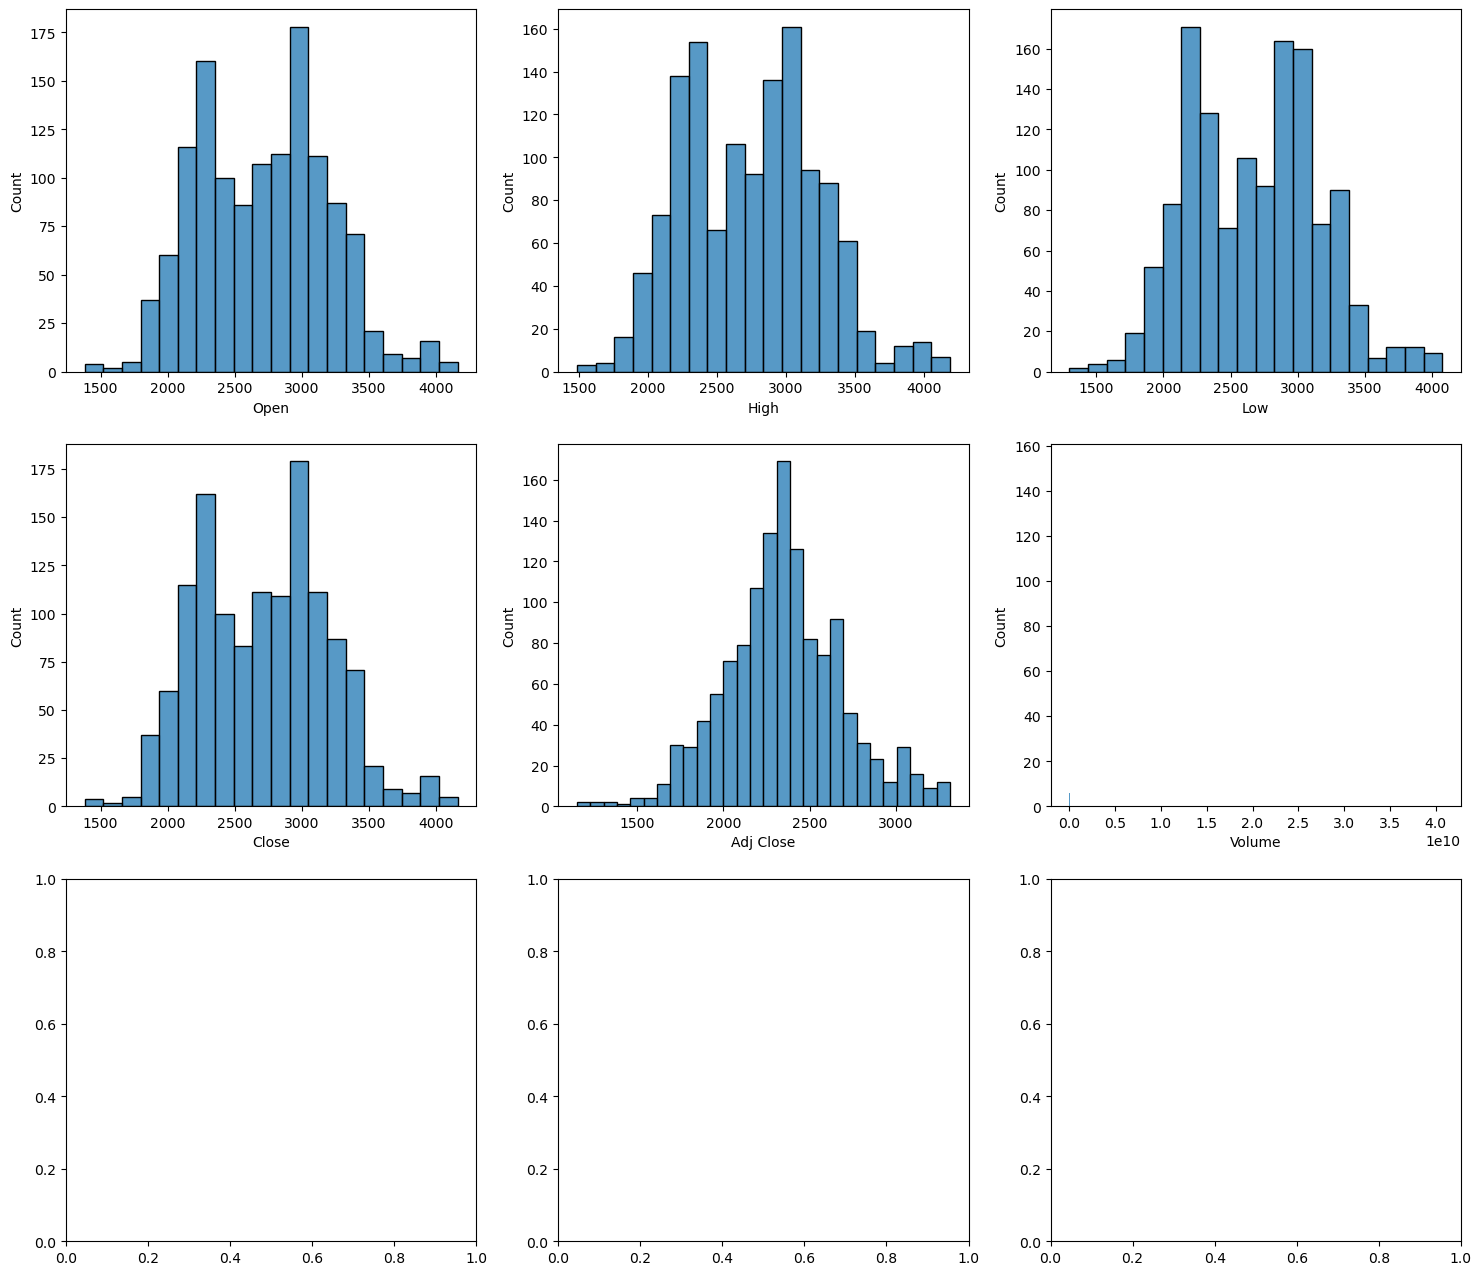

In [158]:
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df_ecopetrolcl[column],ax=axes[i//3,i%3],kde=False)

<AxesSubplot: >

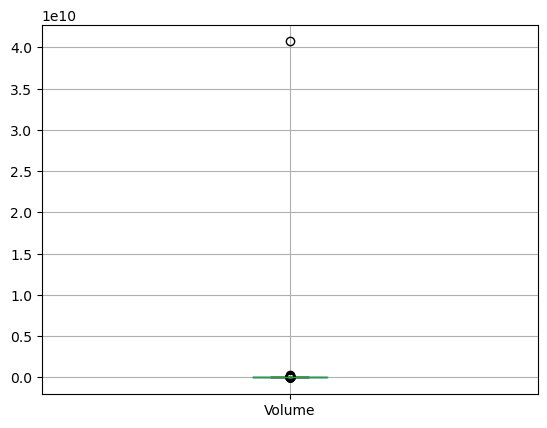

In [159]:
df_ecopetrolcl.boxplot(column=['Volume'])

#### Insights:
- Hay un problema con el rango de la variable "Volume"

### Feature Engineering

- Eliminación de columnas

In [160]:
df_ecopetrolcl.drop(['Adj Close'],axis=1,inplace=True)

In [161]:
df_ecopetrolcl.head(5)

,Date,Open,High,Low,Close,Volume
0,2018-04-09,2745.00,2790.00,2725.00,2745.00,14311863.00
1,2018-04-10,2790.00,2810.00,2775.00,2790.00,16216677.00
2,2018-04-11,2980.00,2990.00,2780.00,2980.00,28627360.00
3,2018-04-12,2955.00,3050.00,2885.00,2955.00,20202015.00
4,2018-04-13,2955.00,3050.00,2885.00,2955.00,20202015.00


- Imputación de valores nulos

In [162]:
df_date=df_ecopetrolcl['Date']
df_ecopetrolcl.drop(['Date'],axis=1,inplace=True)

In [163]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
df_helper=pd.DataFrame(impute_it.fit_transform(df_ecopetrolcl),columns=df_ecopetrolcl.columns)
df_helper.isnull().sum()


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [164]:
df= pd.concat([df_date,df_helper],axis=1)

In [165]:
df.shape

(1305, 6)

#### Eliminando los outliers de la columna "Volume"

In [166]:
df=df[df['Volume']<100000000]

In [167]:
df.shape

(1302, 6)

In [168]:
# Se eliminaron 3 registros (los outliers de la columna "Volumne")

In [169]:
df.to_csv('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 30\ecopetrol.csv')

# Importación de datos

In [170]:
df_ecopetrol = pd.read_csv('ecopetrol.csv',index_col='Date', parse_dates=['Date'])
df_ecopetrol.drop(['Unnamed: 0'],axis=1,inplace=True)

In [171]:
df_ecopetrol.sample(5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-07,1911.00,1915.00,1866.00,1911.00,7623991.00
2020-09-16,2050.00,2075.00,2035.00,2050.00,7633052.00
2021-06-24,2750.00,2780.00,2545.00,2750.00,22177460.00
2020-08-07,2170.00,2170.00,2170.00,2170.00,0.00
2022-02-17,3015.00,3037.00,2991.00,3015.00,6267680.00


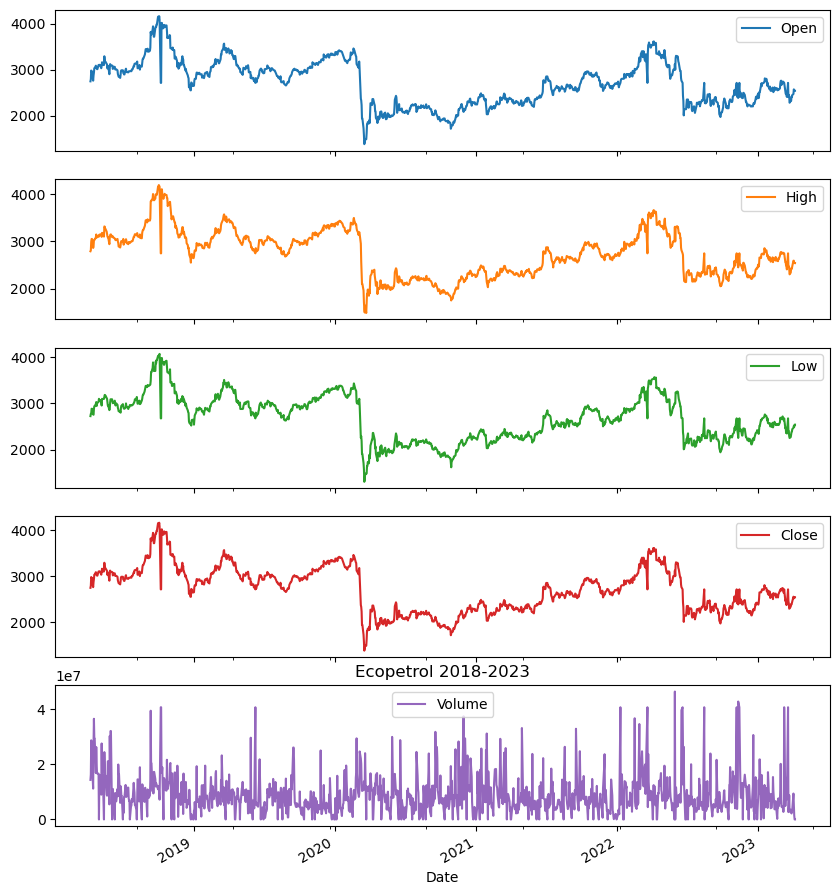

In [172]:
# Visualizacion Basica a traves de rangos
# Usando matplotlib
df_ecopetrol['2018':'2023'].plot(subplots=True, figsize=(10,12))
plt.title('Ecopetrol 2018-2023')
plt.show()


In [173]:
# Informacion de columnas
df_ecopetrol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1302 entries, 2018-04-09 to 2023-04-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1302 non-null   float64
 1   High    1302 non-null   float64
 2   Low     1302 non-null   float64
 3   Close   1302 non-null   float64
 4   Volume  1302 non-null   float64
dtypes: float64(5)
memory usage: 93.3 KB


In [174]:
# Cambia el formato de pandas para visualizar los datos de una forma mas amigable
pd.set_option('display.float_format', lambda x:'%.2f' %x)

In [175]:
#Estadisticas
df_ecopetrol.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1302.00,2711.64,482.98,1380.00,2297.00,2720.00,3048.75,4160.00
High,1302.00,2746.25,484.08,1485.00,2330.25,2749.12,3090.00,4190.00
Low,1302.00,2676.19,480.94,1300.00,2260.00,2686.50,3015.00,4075.00
Close,1302.00,2711.58,483.01,1380.00,2297.00,2720.00,3048.75,4160.00
Volume,1302.00,9065604.04,7083188.11,0.00,4637076.75,7624578.00,11446216.00,46273560.00


 ### Visualización de % Cambios y retornos

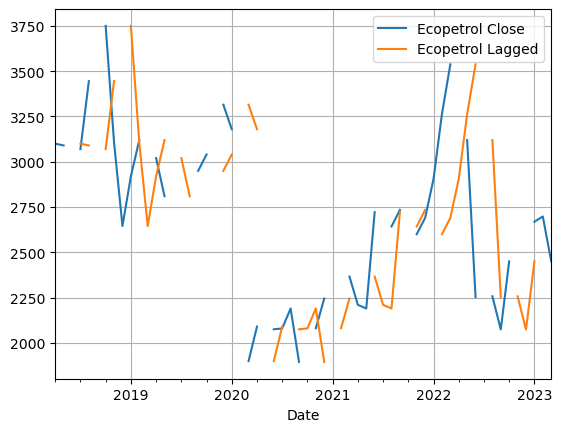

In [176]:
# Lag = 3(meses)
df_ecopetrol['Close'].asfreq('M').plot(legend=True)
lag=3
shifted = df_ecopetrol['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Ecopetrol Close','Ecopetrol Lagged'])
plt.grid()
plt.show()

#### Insights:
- Este gráfico nos ayuda a identificar cambios de tendencias o rupturas de la misma.
- En la primera parte del 2020 se evidencia una fuerte ruptura de la tendencia que tenia la serie
- Además, se destaca el hecho de que es una serie muy inestable.
- Tiene varios periodos con una tendencia positiva y después una abrupta caida.

In [177]:
# Grafico de cambio porcentual basado en el Close
df_ecopetrol['change'] = df_ecopetrol.Close.div(df_ecopetrol.Close.shift())

In [179]:
pd.set_option('display.float_format', lambda x:'%.4f' % x)
df_ecopetrol.head(5)

,Open,High,Low,Close,Volume,change
Date,,,,,,
2018-04-09,2745.0000,2790.0000,2725.0000,2745.0000,14311863.0000,NaN
2018-04-10,2790.0000,2810.0000,2775.0000,2790.0000,16216677.0000,1.0164
2018-04-11,2980.0000,2990.0000,2780.0000,2980.0000,28627360.0000,1.0681
2018-04-12,2955.0000,3050.0000,2885.0000,2955.0000,20202015.0000,0.9916
2018-04-13,2955.0000,3050.0000,2885.0000,2955.0000,20202015.0000,1.0000


Text(0.5, 1.0, 'Cambio variable close')

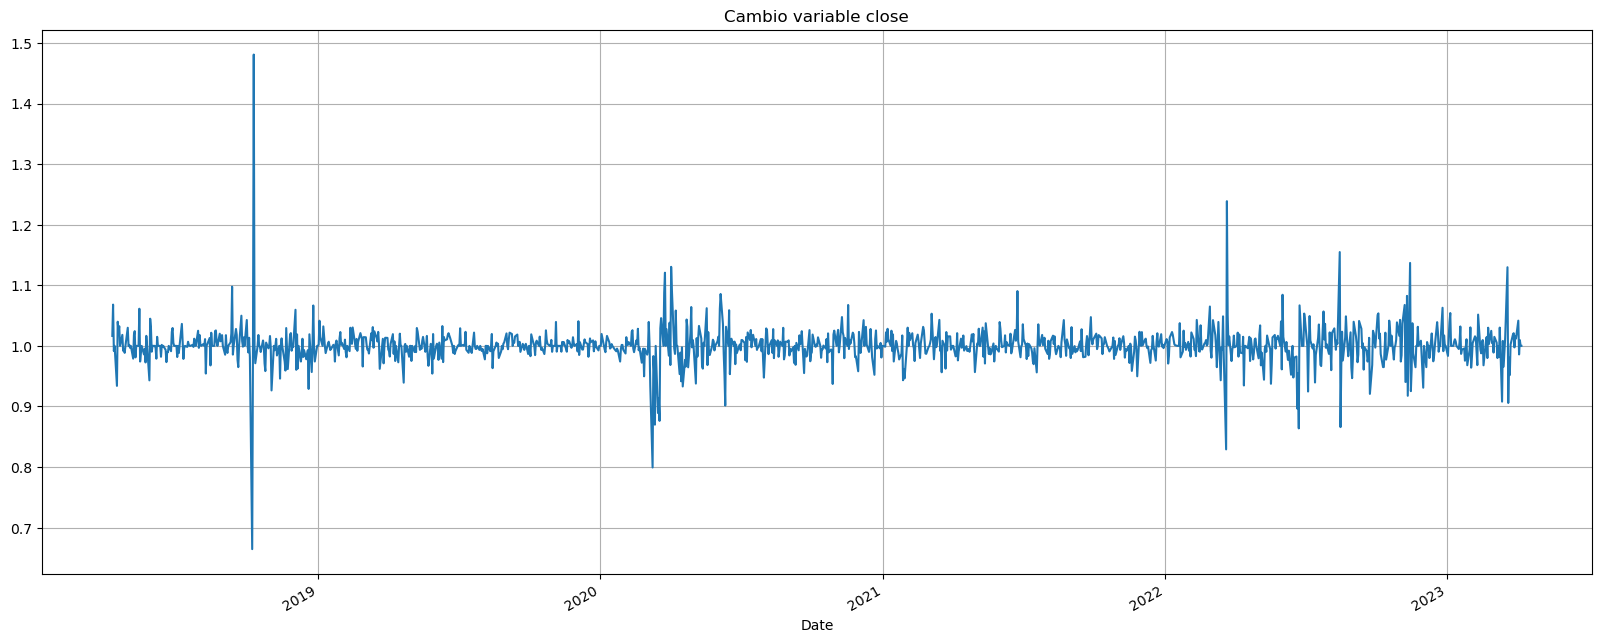

In [182]:
df_ecopetrol['change'].plot(figsize=(20,8)).grid()
plt.title('Cambio variable close')

In [183]:
# Calcula el Retorno
df_ecopetrol['Return']=df_ecopetrol.change.sub(1).mul(100)

In [184]:
df_ecopetrol.head(5)

,Open,High,Low,Close,Volume,change,Return
Date,,,,,,,
2018-04-09,2745.0000,2790.0000,2725.0000,2745.0000,14311863.0000,NaN,NaN
2018-04-10,2790.0000,2810.0000,2775.0000,2790.0000,16216677.0000,1.0164,1.6393
2018-04-11,2980.0000,2990.0000,2780.0000,2980.0000,28627360.0000,1.0681,6.8100
2018-04-12,2955.0000,3050.0000,2885.0000,2955.0000,20202015.0000,0.9916,-0.8389
2018-04-13,2955.0000,3050.0000,2885.0000,2955.0000,20202015.0000,1.0000,0.0000


Text(0.5, 1.0, 'Retorno basado en la variable close')

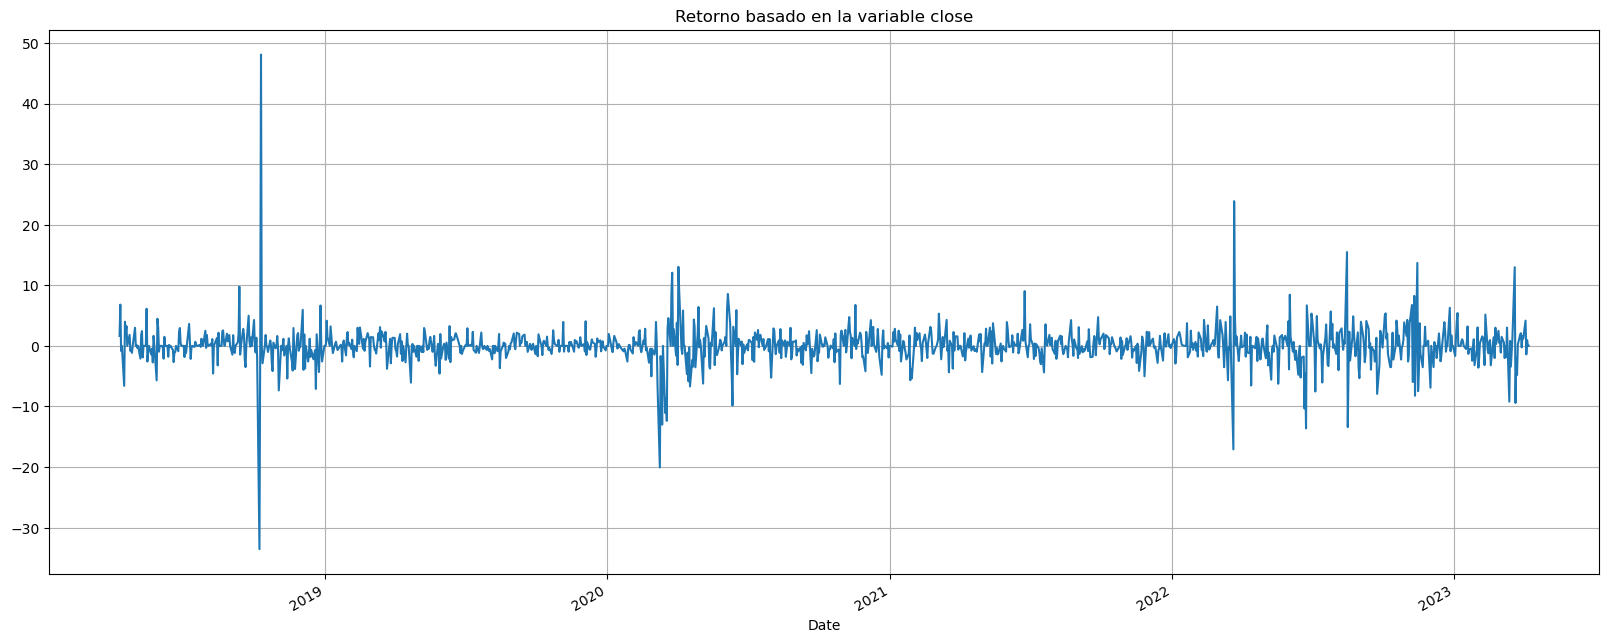

In [185]:
df_ecopetrol['Return'].plot(figsize=(20,8)).grid()
plt.title('Retorno basado en la variable close')

#### Insights:
- Antes del 2019 hay una gran desbalance del retorno.
- El año 2022 es el que tiene mayor inestabilidad. varios picos positivos y negativos

# Comparación de dos Series

- Para que el index de las dos series coincida se debe eliminar un registro del dataset de Terpel

In [186]:
# Se usa la funcion read_csv para leer el archivo .csv
# Se usa index_col con Date para usar la fecha como indice
df_terpel = pd.read_csv(' terpel.csv',index_col='Date',parse_dates=['Date'])

In [187]:
df_terpel.sample(5)

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-01,452,10000.0000,10000.0000,10000.0000,10000.0000,0.0000
2019-10-25,404,10700.0000,10700.0000,10700.0000,10700.0000,477.0000
2020-05-14,548,7480.0000,7480.0000,7480.0000,7480.0000,1353.0000
2021-11-01,720,8280.0000,8280.0000,8280.0000,8280.0000,0.0000
2021-02-12,953,8500.0000,8500.0000,8500.0000,8500.0000,10211.0000


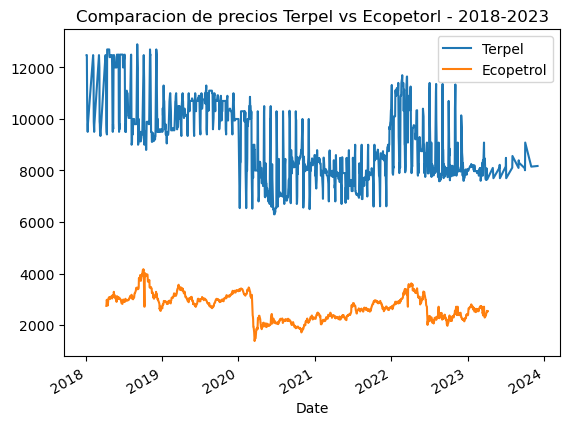

In [188]:
# Grafico de columnas de series diferentes
# Los precios son muy diferentes, lo que no deja ver el comportamiento exacto de cada una
df_terpel.Close.plot()
df_ecopetrol.Close.plot()
plt.legend(['Terpel','Ecopetrol'])
plt.title('Comparacion de precios Terpel vs Ecopetorl - 2018-2023')
plt.show()

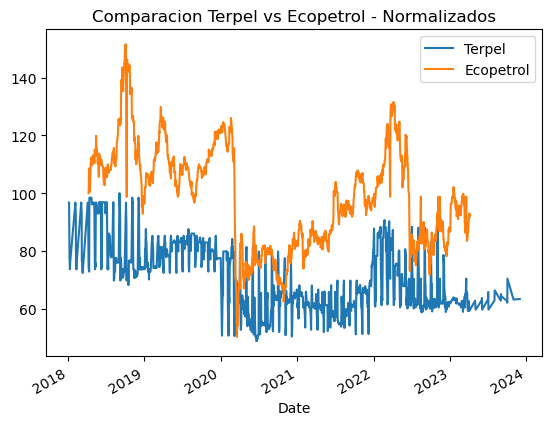

In [189]:
# Se normalizan las vistas con base 100 para tener una base de comparacion similar
# La normalizacion toma como base el primer registro historico (iloc[0])
# Ambos precios empiezan en 100
normal_terpel = df_terpel.Close.div(df_terpel.Close.iloc[0]).mul(100)
normal_ecopetrol = df_ecopetrol.Close.div(df_ecopetrol.Close.iloc[0]).mul(100)
normal_terpel.plot()
normal_ecopetrol.plot()
plt.legend(['Terpel','Ecopetrol'])
plt.title('Comparacion Terpel vs Ecopetrol - Normalizados')
plt.show()

###  Gráficos OHLC y candlestick

In [190]:
# Se importan las librerias de base
%matplotlib inline
from pylab import rcParams

# Instala chart_studio

from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [191]:
#from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [192]:
# Graphic OHLC del 2022 para ecopetrol

trace = go.Ohlc(x=df_ecopetrol['2022'].index,
                     open=df_ecopetrol['2022'].Open,
                     high=df_ecopetrol['2022'].High,
                     low=df_ecopetrol['2022'].Low,
                     close=df_ecopetrol['2022'].Close)
data= [trace]
iplot(data, filename='simple_ohlc')

In [193]:
# Graphic candlesticks de ecopetrol 2023 para ecopetrol

trace = go.Candlestick(x=df_ecopetrol['2023'].index,
                     open=df_ecopetrol['2023'].Open,
                     high=df_ecopetrol['2023'].High,
                     low=df_ecopetrol['2023'].Low,
                     close=df_ecopetrol['2023'].Close)
data= [trace]
iplot(data)

### Descomposición de la Serie de Tiempo

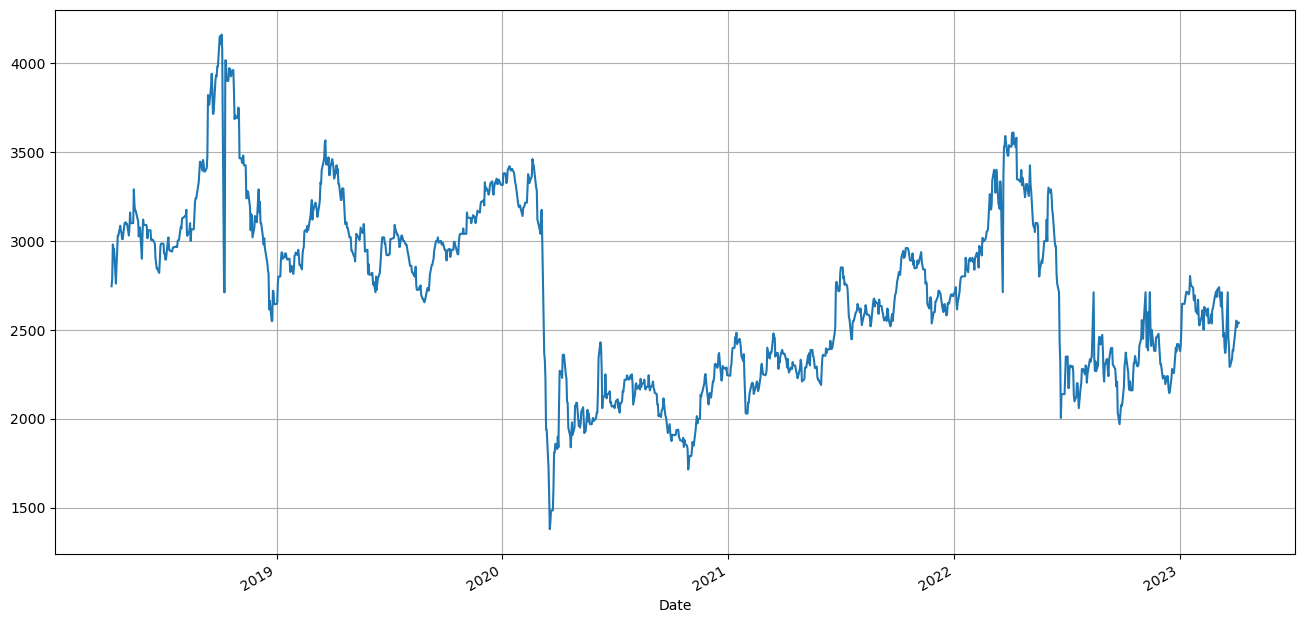

In [194]:
# Se toma el precio close de ecopetrol nuevamente
df_ecopetrol['Close'].plot(figsize=(16,8)).grid()

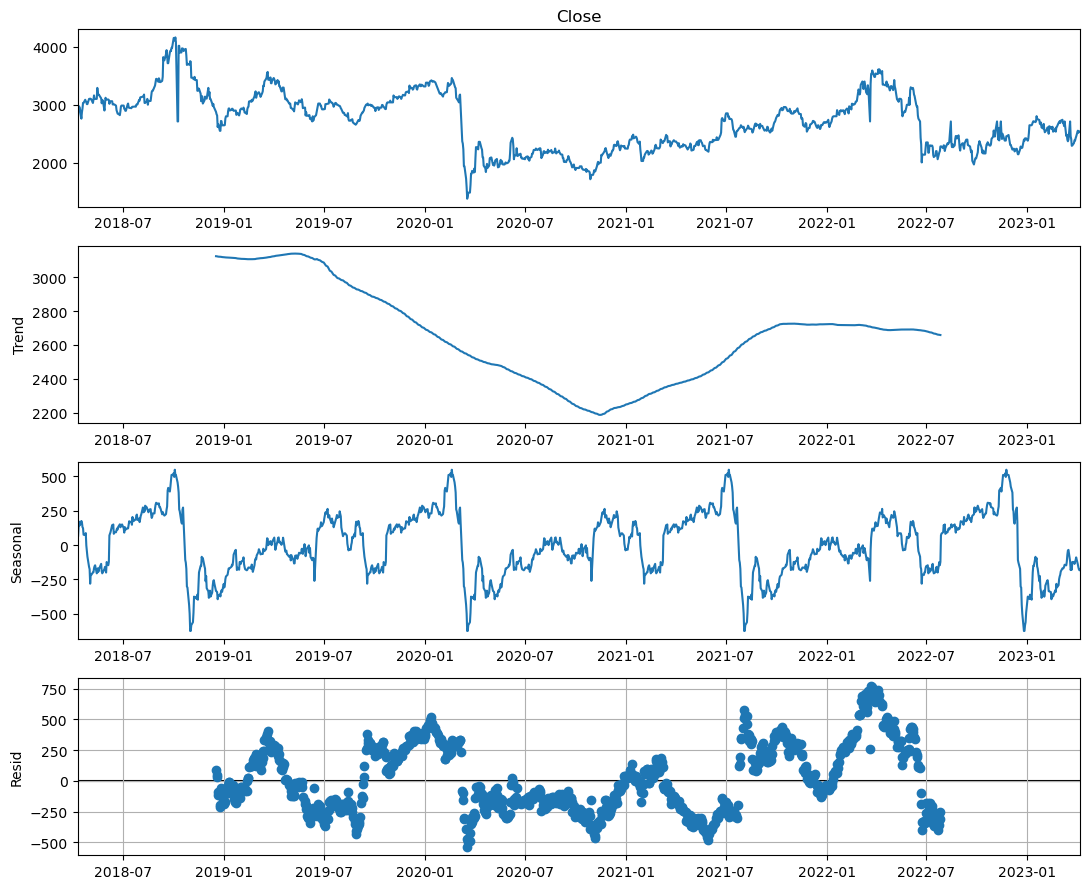

In [195]:
# Para la descomposicion
rcParams['figure.figsize']=11,9

# Se usa la frecuencia anual
decomposed_ecopetrol_volume = sm.tsa.seasonal_decompose(df_ecopetrol['Close'], period=360)

figure= decomposed_ecopetrol_volume.plot()
plt.grid()
plt.show()